# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


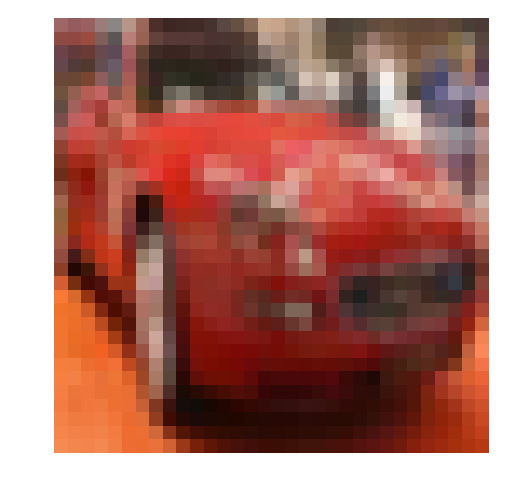

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [5]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    return x / x.max(axis=0)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [6]:
from sklearn import preprocessing

In [7]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    label_binarizer = preprocessing.LabelBinarizer()
    encoded_labels = range(10)
    label_binarizer.fit(encoded_labels)
    return label_binarizer.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [10]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    return tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [11]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """

    # Weights and bias
    weights = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1], x_tensor.shape.as_list()[3], conv_num_outputs], stddev=0.1))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # Apply convolution
    conv_layer = tf.nn.conv2d(x_tensor, weights, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)
    
    # Apply max pooling
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1, pool_ksize[0], pool_ksize[1], 1], strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [12]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    shape = x_tensor.shape.as_list()
    return tf.reshape(x_tensor, [-1, np.prod(shape[1:])])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [37]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Weights and bias
    weights = tf.Variable(tf.truncated_normal([x_tensor.shape.as_list()[1], num_outputs]))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    # Calculate tensor
    tensor = tf.add(tf.matmul(x_tensor, weights), bias)
    
    # Apply activation function
    tensor = tf.nn.relu(tensor)
    
    return tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [14]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Weights and bias
    weights = tf.Variable(tf.truncated_normal([x_tensor.shape.as_list()[1], num_outputs]))
    bias = tf.Variable(tf.random_uniform([num_outputs], -0.1, 0.1))
    
    # Calculate tensor
    tensor = tf.add(tf.matmul(x_tensor, weights), bias)
    
    return tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [50]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Apply 1, 2, or 3 Convolution and Max Pool layers   
    
    conv_ksize       = (3,3)
    conv_strides     = (1,1)
    pool_ksize       = (2,2)
    pool_strides     = (2,2)
    
    conv_num_outputs_1 = 24
    conv_num_outputs_2 = 48
    
    conv_layer = conv2d_maxpool(x, conv_num_outputs_1, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_layer = conv2d_maxpool(x, conv_num_outputs_2, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Apply a Flatten Layer
    conv_layer = flatten(conv_layer)
    
    # Apply 1, 2, or 3 Fully Connected Layers
    conv_layer = fully_conn(conv_layer, 512)
    
    # Apply dropout
    conv_layer = tf.nn.dropout(conv_layer, keep_prob)
    
    # Apply Output Layer
    conv_layer = output(conv_layer, 10)
    
    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [22]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [17]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = session.run(cost, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1})
    validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1})
    print("Loss: {:.3f} Accuracy: {:.3f}".format(loss, validation_accuracy), end="\n")

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [55]:
# Tune Parameters
epochs = 500
batch_size = 256
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [54]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss: 23.199 Accuracy: 0.213
Epoch  2, CIFAR-10 Batch 1:  Loss: 9.607 Accuracy: 0.204
Epoch  3, CIFAR-10 Batch 1:  Loss: 5.149 Accuracy: 0.187
Epoch  4, CIFAR-10 Batch 1:  Loss: 3.039 Accuracy: 0.166
Epoch  5, CIFAR-10 Batch 1:  Loss: 2.530 Accuracy: 0.179
Epoch  6, CIFAR-10 Batch 1:  Loss: 2.382 Accuracy: 0.191
Epoch  7, CIFAR-10 Batch 1:  Loss: 2.303 Accuracy: 0.204
Epoch  8, CIFAR-10 Batch 1:  Loss: 2.255 Accuracy: 0.210
Epoch  9, CIFAR-10 Batch 1:  Loss: 2.222 Accuracy: 0.209
Epoch 10, CIFAR-10 Batch 1:  Loss: 2.196 Accuracy: 0.218
Epoch 11, CIFAR-10 Batch 1:  Loss: 2.176 Accuracy: 0.216
Epoch 12, CIFAR-10 Batch 1:  Loss: 2.160 Accuracy: 0.220
Epoch 13, CIFAR-10 Batch 1:  Loss: 2.150 Accuracy: 0.229
Epoch 14, CIFAR-10 Batch 1:  Loss: 2.144 Accuracy: 0.222
Epoch 15, CIFAR-10 Batch 1:  Loss: 2.133 Accuracy: 0.229
Epoch 16, CIFAR-10 Batch 1:  Loss: 2.123 Accuracy: 0.236
Epoch 17, CIFAR-10 Batch 1:  Loss: 2.121 Acc

Epoch 143, CIFAR-10 Batch 1:  Loss: 2.362 Accuracy: 0.342
Epoch 144, CIFAR-10 Batch 1:  Loss: 2.357 Accuracy: 0.348
Epoch 145, CIFAR-10 Batch 1:  Loss: 2.348 Accuracy: 0.344
Epoch 146, CIFAR-10 Batch 1:  Loss: 2.353 Accuracy: 0.344
Epoch 147, CIFAR-10 Batch 1:  Loss: 2.385 Accuracy: 0.346
Epoch 148, CIFAR-10 Batch 1:  Loss: 2.377 Accuracy: 0.345
Epoch 149, CIFAR-10 Batch 1:  Loss: 2.385 Accuracy: 0.348
Epoch 150, CIFAR-10 Batch 1:  Loss: 2.385 Accuracy: 0.348
Epoch 151, CIFAR-10 Batch 1:  Loss: 2.382 Accuracy: 0.349
Epoch 152, CIFAR-10 Batch 1:  Loss: 2.366 Accuracy: 0.346
Epoch 153, CIFAR-10 Batch 1:  Loss: 2.383 Accuracy: 0.350
Epoch 154, CIFAR-10 Batch 1:  Loss: 2.441 Accuracy: 0.352
Epoch 155, CIFAR-10 Batch 1:  Loss: 2.421 Accuracy: 0.351
Epoch 156, CIFAR-10 Batch 1:  Loss: 2.430 Accuracy: 0.351
Epoch 157, CIFAR-10 Batch 1:  Loss: 2.427 Accuracy: 0.350
Epoch 158, CIFAR-10 Batch 1:  Loss: 2.415 Accuracy: 0.352
Epoch 159, CIFAR-10 Batch 1:  Loss: 2.444 Accuracy: 0.354
Epoch 160, CIF

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [56]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss: 39.071 Accuracy: 0.223
Epoch  1, CIFAR-10 Batch 2:  Loss: 14.669 Accuracy: 0.243
Epoch  1, CIFAR-10 Batch 3:  Loss: 5.711 Accuracy: 0.222
Epoch  1, CIFAR-10 Batch 4:  Loss: 2.635 Accuracy: 0.141
Epoch  1, CIFAR-10 Batch 5:  Loss: 2.419 Accuracy: 0.118
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.363 Accuracy: 0.112
Epoch  2, CIFAR-10 Batch 2:  Loss: 2.344 Accuracy: 0.106
Epoch  2, CIFAR-10 Batch 3:  Loss: 2.334 Accuracy: 0.103
Epoch  2, CIFAR-10 Batch 4:  Loss: 2.328 Accuracy: 0.102
Epoch  2, CIFAR-10 Batch 5:  Loss: 2.324 Accuracy: 0.101
Epoch  3, CIFAR-10 Batch 1:  Loss: 2.321 Accuracy: 0.102
Epoch  3, CIFAR-10 Batch 2:  Loss: 2.318 Accuracy: 0.101
Epoch  3, CIFAR-10 Batch 3:  Loss: 2.318 Accuracy: 0.101
Epoch  3, CIFAR-10 Batch 4:  Loss: 2.317 Accuracy: 0.102
Epoch  3, CIFAR-10 Batch 5:  Loss: 2.316 Accuracy: 0.099
Epoch  4, CIFAR-10 Batch 1:  Loss: 2.315 Accuracy: 0.100
Epoch  4, CIFAR-10 Batch 2:  Loss: 2.315 Accuracy: 0.099
Epoch  4, CIFAR-1

Epoch 29, CIFAR-10 Batch 4:  Loss: 1.765 Accuracy: 0.338
Epoch 29, CIFAR-10 Batch 5:  Loss: 1.771 Accuracy: 0.326
Epoch 30, CIFAR-10 Batch 1:  Loss: 1.767 Accuracy: 0.338
Epoch 30, CIFAR-10 Batch 2:  Loss: 1.775 Accuracy: 0.318
Epoch 30, CIFAR-10 Batch 3:  Loss: 1.757 Accuracy: 0.344
Epoch 30, CIFAR-10 Batch 4:  Loss: 1.743 Accuracy: 0.345
Epoch 30, CIFAR-10 Batch 5:  Loss: 1.753 Accuracy: 0.339
Epoch 31, CIFAR-10 Batch 1:  Loss: 1.770 Accuracy: 0.338
Epoch 31, CIFAR-10 Batch 2:  Loss: 1.773 Accuracy: 0.313
Epoch 31, CIFAR-10 Batch 3:  Loss: 1.791 Accuracy: 0.312
Epoch 31, CIFAR-10 Batch 4:  Loss: 1.737 Accuracy: 0.346
Epoch 31, CIFAR-10 Batch 5:  Loss: 1.727 Accuracy: 0.358
Epoch 32, CIFAR-10 Batch 1:  Loss: 1.757 Accuracy: 0.345
Epoch 32, CIFAR-10 Batch 2:  Loss: 1.737 Accuracy: 0.336
Epoch 32, CIFAR-10 Batch 3:  Loss: 1.723 Accuracy: 0.352
Epoch 32, CIFAR-10 Batch 4:  Loss: 1.708 Accuracy: 0.366
Epoch 32, CIFAR-10 Batch 5:  Loss: 1.726 Accuracy: 0.352
Epoch 33, CIFAR-10 Batch 1:  Lo

Epoch 58, CIFAR-10 Batch 3:  Loss: 1.450 Accuracy: 0.481
Epoch 58, CIFAR-10 Batch 4:  Loss: 1.455 Accuracy: 0.480
Epoch 58, CIFAR-10 Batch 5:  Loss: 1.461 Accuracy: 0.469
Epoch 59, CIFAR-10 Batch 1:  Loss: 1.466 Accuracy: 0.491
Epoch 59, CIFAR-10 Batch 2:  Loss: 1.444 Accuracy: 0.492
Epoch 59, CIFAR-10 Batch 3:  Loss: 1.449 Accuracy: 0.493
Epoch 59, CIFAR-10 Batch 4:  Loss: 1.445 Accuracy: 0.491
Epoch 59, CIFAR-10 Batch 5:  Loss: 1.454 Accuracy: 0.488
Epoch 60, CIFAR-10 Batch 1:  Loss: 1.432 Accuracy: 0.494
Epoch 60, CIFAR-10 Batch 2:  Loss: 1.459 Accuracy: 0.485
Epoch 60, CIFAR-10 Batch 3:  Loss: 1.423 Accuracy: 0.496
Epoch 60, CIFAR-10 Batch 4:  Loss: 1.433 Accuracy: 0.497
Epoch 60, CIFAR-10 Batch 5:  Loss: 1.436 Accuracy: 0.492
Epoch 61, CIFAR-10 Batch 1:  Loss: 1.437 Accuracy: 0.504
Epoch 61, CIFAR-10 Batch 2:  Loss: 1.424 Accuracy: 0.501
Epoch 61, CIFAR-10 Batch 3:  Loss: 1.408 Accuracy: 0.505
Epoch 61, CIFAR-10 Batch 4:  Loss: 1.443 Accuracy: 0.490
Epoch 61, CIFAR-10 Batch 5:  Lo

Epoch 87, CIFAR-10 Batch 2:  Loss: 1.286 Accuracy: 0.562
Epoch 87, CIFAR-10 Batch 3:  Loss: 1.288 Accuracy: 0.573
Epoch 87, CIFAR-10 Batch 4:  Loss: 1.268 Accuracy: 0.566
Epoch 87, CIFAR-10 Batch 5:  Loss: 1.270 Accuracy: 0.556
Epoch 88, CIFAR-10 Batch 1:  Loss: 1.279 Accuracy: 0.565
Epoch 88, CIFAR-10 Batch 2:  Loss: 1.294 Accuracy: 0.559
Epoch 88, CIFAR-10 Batch 3:  Loss: 1.290 Accuracy: 0.568
Epoch 88, CIFAR-10 Batch 4:  Loss: 1.251 Accuracy: 0.571
Epoch 88, CIFAR-10 Batch 5:  Loss: 1.264 Accuracy: 0.560
Epoch 89, CIFAR-10 Batch 1:  Loss: 1.300 Accuracy: 0.567
Epoch 89, CIFAR-10 Batch 2:  Loss: 1.299 Accuracy: 0.559
Epoch 89, CIFAR-10 Batch 3:  Loss: 1.288 Accuracy: 0.571
Epoch 89, CIFAR-10 Batch 4:  Loss: 1.272 Accuracy: 0.565
Epoch 89, CIFAR-10 Batch 5:  Loss: 1.285 Accuracy: 0.558
Epoch 90, CIFAR-10 Batch 1:  Loss: 1.271 Accuracy: 0.569
Epoch 90, CIFAR-10 Batch 2:  Loss: 1.287 Accuracy: 0.565
Epoch 90, CIFAR-10 Batch 3:  Loss: 1.274 Accuracy: 0.578
Epoch 90, CIFAR-10 Batch 4:  Lo

Epoch 115, CIFAR-10 Batch 4:  Loss: 1.258 Accuracy: 0.587
Epoch 115, CIFAR-10 Batch 5:  Loss: 1.282 Accuracy: 0.590
Epoch 116, CIFAR-10 Batch 1:  Loss: 1.266 Accuracy: 0.587
Epoch 116, CIFAR-10 Batch 2:  Loss: 1.277 Accuracy: 0.577
Epoch 116, CIFAR-10 Batch 3:  Loss: 1.274 Accuracy: 0.594
Epoch 116, CIFAR-10 Batch 4:  Loss: 1.300 Accuracy: 0.582
Epoch 116, CIFAR-10 Batch 5:  Loss: 1.255 Accuracy: 0.591
Epoch 117, CIFAR-10 Batch 1:  Loss: 1.293 Accuracy: 0.581
Epoch 117, CIFAR-10 Batch 2:  Loss: 1.275 Accuracy: 0.588
Epoch 117, CIFAR-10 Batch 3:  Loss: 1.323 Accuracy: 0.598
Epoch 117, CIFAR-10 Batch 4:  Loss: 1.325 Accuracy: 0.594
Epoch 117, CIFAR-10 Batch 5:  Loss: 1.259 Accuracy: 0.587
Epoch 118, CIFAR-10 Batch 1:  Loss: 1.252 Accuracy: 0.593
Epoch 118, CIFAR-10 Batch 2:  Loss: 1.270 Accuracy: 0.589
Epoch 118, CIFAR-10 Batch 3:  Loss: 1.331 Accuracy: 0.598
Epoch 118, CIFAR-10 Batch 4:  Loss: 1.314 Accuracy: 0.584
Epoch 118, CIFAR-10 Batch 5:  Loss: 1.262 Accuracy: 0.593
Epoch 119, CIF

Epoch 143, CIFAR-10 Batch 5:  Loss: 1.334 Accuracy: 0.593
Epoch 144, CIFAR-10 Batch 1:  Loss: 1.411 Accuracy: 0.595
Epoch 144, CIFAR-10 Batch 2:  Loss: 1.351 Accuracy: 0.597
Epoch 144, CIFAR-10 Batch 3:  Loss: 1.389 Accuracy: 0.608
Epoch 144, CIFAR-10 Batch 4:  Loss: 1.354 Accuracy: 0.591
Epoch 144, CIFAR-10 Batch 5:  Loss: 1.344 Accuracy: 0.596
Epoch 145, CIFAR-10 Batch 1:  Loss: 1.394 Accuracy: 0.590
Epoch 145, CIFAR-10 Batch 2:  Loss: 1.355 Accuracy: 0.598
Epoch 145, CIFAR-10 Batch 3:  Loss: 1.399 Accuracy: 0.605
Epoch 145, CIFAR-10 Batch 4:  Loss: 1.325 Accuracy: 0.604
Epoch 145, CIFAR-10 Batch 5:  Loss: 1.347 Accuracy: 0.600
Epoch 146, CIFAR-10 Batch 1:  Loss: 1.429 Accuracy: 0.588
Epoch 146, CIFAR-10 Batch 2:  Loss: 1.379 Accuracy: 0.596
Epoch 146, CIFAR-10 Batch 3:  Loss: 1.464 Accuracy: 0.604
Epoch 146, CIFAR-10 Batch 4:  Loss: 1.375 Accuracy: 0.597
Epoch 146, CIFAR-10 Batch 5:  Loss: 1.363 Accuracy: 0.591
Epoch 147, CIFAR-10 Batch 1:  Loss: 1.429 Accuracy: 0.593
Epoch 147, CIF

Epoch 172, CIFAR-10 Batch 1:  Loss: 1.496 Accuracy: 0.602
Epoch 172, CIFAR-10 Batch 2:  Loss: 1.647 Accuracy: 0.586
Epoch 172, CIFAR-10 Batch 3:  Loss: 1.575 Accuracy: 0.599
Epoch 172, CIFAR-10 Batch 4:  Loss: 1.485 Accuracy: 0.599
Epoch 172, CIFAR-10 Batch 5:  Loss: 1.492 Accuracy: 0.604
Epoch 173, CIFAR-10 Batch 1:  Loss: 1.512 Accuracy: 0.599
Epoch 173, CIFAR-10 Batch 2:  Loss: 1.667 Accuracy: 0.578
Epoch 173, CIFAR-10 Batch 3:  Loss: 1.618 Accuracy: 0.596
Epoch 173, CIFAR-10 Batch 4:  Loss: 1.474 Accuracy: 0.584
Epoch 173, CIFAR-10 Batch 5:  Loss: 1.500 Accuracy: 0.602
Epoch 174, CIFAR-10 Batch 1:  Loss: 1.552 Accuracy: 0.600
Epoch 174, CIFAR-10 Batch 2:  Loss: 1.628 Accuracy: 0.583
Epoch 174, CIFAR-10 Batch 3:  Loss: 1.634 Accuracy: 0.599
Epoch 174, CIFAR-10 Batch 4:  Loss: 1.506 Accuracy: 0.598
Epoch 174, CIFAR-10 Batch 5:  Loss: 1.539 Accuracy: 0.600
Epoch 175, CIFAR-10 Batch 1:  Loss: 1.496 Accuracy: 0.602
Epoch 175, CIFAR-10 Batch 2:  Loss: 1.602 Accuracy: 0.586
Epoch 175, CIF

Epoch 200, CIFAR-10 Batch 2:  Loss: 1.780 Accuracy: 0.595
Epoch 200, CIFAR-10 Batch 3:  Loss: 1.697 Accuracy: 0.603
Epoch 200, CIFAR-10 Batch 4:  Loss: 1.776 Accuracy: 0.609
Epoch 200, CIFAR-10 Batch 5:  Loss: 1.723 Accuracy: 0.604
Epoch 201, CIFAR-10 Batch 1:  Loss: 1.708 Accuracy: 0.595
Epoch 201, CIFAR-10 Batch 2:  Loss: 1.727 Accuracy: 0.602
Epoch 201, CIFAR-10 Batch 3:  Loss: 1.785 Accuracy: 0.601
Epoch 201, CIFAR-10 Batch 4:  Loss: 1.765 Accuracy: 0.604
Epoch 201, CIFAR-10 Batch 5:  Loss: 1.668 Accuracy: 0.609
Epoch 202, CIFAR-10 Batch 1:  Loss: 1.727 Accuracy: 0.603
Epoch 202, CIFAR-10 Batch 2:  Loss: 1.802 Accuracy: 0.590
Epoch 202, CIFAR-10 Batch 3:  Loss: 1.755 Accuracy: 0.596
Epoch 202, CIFAR-10 Batch 4:  Loss: 1.832 Accuracy: 0.608
Epoch 202, CIFAR-10 Batch 5:  Loss: 1.705 Accuracy: 0.606
Epoch 203, CIFAR-10 Batch 1:  Loss: 1.707 Accuracy: 0.604
Epoch 203, CIFAR-10 Batch 2:  Loss: 1.797 Accuracy: 0.597
Epoch 203, CIFAR-10 Batch 3:  Loss: 1.821 Accuracy: 0.589
Epoch 203, CIF

Epoch 228, CIFAR-10 Batch 3:  Loss: 2.003 Accuracy: 0.597
Epoch 228, CIFAR-10 Batch 4:  Loss: 2.001 Accuracy: 0.596
Epoch 228, CIFAR-10 Batch 5:  Loss: 1.850 Accuracy: 0.611
Epoch 229, CIFAR-10 Batch 1:  Loss: 2.002 Accuracy: 0.594
Epoch 229, CIFAR-10 Batch 2:  Loss: 2.089 Accuracy: 0.595
Epoch 229, CIFAR-10 Batch 3:  Loss: 2.107 Accuracy: 0.596
Epoch 229, CIFAR-10 Batch 4:  Loss: 1.916 Accuracy: 0.600
Epoch 229, CIFAR-10 Batch 5:  Loss: 1.966 Accuracy: 0.604
Epoch 230, CIFAR-10 Batch 1:  Loss: 2.045 Accuracy: 0.591
Epoch 230, CIFAR-10 Batch 2:  Loss: 2.124 Accuracy: 0.598
Epoch 230, CIFAR-10 Batch 3:  Loss: 2.124 Accuracy: 0.598
Epoch 230, CIFAR-10 Batch 4:  Loss: 2.084 Accuracy: 0.596
Epoch 230, CIFAR-10 Batch 5:  Loss: 2.021 Accuracy: 0.610
Epoch 231, CIFAR-10 Batch 1:  Loss: 2.015 Accuracy: 0.592
Epoch 231, CIFAR-10 Batch 2:  Loss: 2.023 Accuracy: 0.604
Epoch 231, CIFAR-10 Batch 3:  Loss: 2.114 Accuracy: 0.595
Epoch 231, CIFAR-10 Batch 4:  Loss: 2.043 Accuracy: 0.591
Epoch 231, CIF

Epoch 256, CIFAR-10 Batch 4:  Loss: 2.286 Accuracy: 0.602
Epoch 256, CIFAR-10 Batch 5:  Loss: 2.250 Accuracy: 0.604
Epoch 257, CIFAR-10 Batch 1:  Loss: 2.406 Accuracy: 0.596
Epoch 257, CIFAR-10 Batch 2:  Loss: 2.484 Accuracy: 0.589
Epoch 257, CIFAR-10 Batch 3:  Loss: 2.403 Accuracy: 0.597
Epoch 257, CIFAR-10 Batch 4:  Loss: 2.311 Accuracy: 0.603
Epoch 257, CIFAR-10 Batch 5:  Loss: 2.265 Accuracy: 0.608
Epoch 258, CIFAR-10 Batch 1:  Loss: 2.519 Accuracy: 0.592
Epoch 258, CIFAR-10 Batch 2:  Loss: 2.584 Accuracy: 0.583
Epoch 258, CIFAR-10 Batch 3:  Loss: 2.476 Accuracy: 0.601
Epoch 258, CIFAR-10 Batch 4:  Loss: 2.293 Accuracy: 0.596
Epoch 258, CIFAR-10 Batch 5:  Loss: 2.303 Accuracy: 0.601
Epoch 259, CIFAR-10 Batch 1:  Loss: 2.502 Accuracy: 0.589
Epoch 259, CIFAR-10 Batch 2:  Loss: 2.458 Accuracy: 0.583
Epoch 259, CIFAR-10 Batch 3:  Loss: 2.581 Accuracy: 0.596
Epoch 259, CIFAR-10 Batch 4:  Loss: 2.277 Accuracy: 0.604
Epoch 259, CIFAR-10 Batch 5:  Loss: 2.285 Accuracy: 0.605
Epoch 260, CIF

Epoch 284, CIFAR-10 Batch 5:  Loss: 2.652 Accuracy: 0.598
Epoch 285, CIFAR-10 Batch 1:  Loss: 2.826 Accuracy: 0.577
Epoch 285, CIFAR-10 Batch 2:  Loss: 2.978 Accuracy: 0.587
Epoch 285, CIFAR-10 Batch 3:  Loss: 2.635 Accuracy: 0.602
Epoch 285, CIFAR-10 Batch 4:  Loss: 2.532 Accuracy: 0.596
Epoch 285, CIFAR-10 Batch 5:  Loss: 2.766 Accuracy: 0.591
Epoch 286, CIFAR-10 Batch 1:  Loss: 2.859 Accuracy: 0.583
Epoch 286, CIFAR-10 Batch 2:  Loss: 2.920 Accuracy: 0.584
Epoch 286, CIFAR-10 Batch 3:  Loss: 2.654 Accuracy: 0.602
Epoch 286, CIFAR-10 Batch 4:  Loss: 2.436 Accuracy: 0.601
Epoch 286, CIFAR-10 Batch 5:  Loss: 2.653 Accuracy: 0.595
Epoch 287, CIFAR-10 Batch 1:  Loss: 2.805 Accuracy: 0.587
Epoch 287, CIFAR-10 Batch 2:  Loss: 2.767 Accuracy: 0.589
Epoch 287, CIFAR-10 Batch 3:  Loss: 2.705 Accuracy: 0.597
Epoch 287, CIFAR-10 Batch 4:  Loss: 2.519 Accuracy: 0.593
Epoch 287, CIFAR-10 Batch 5:  Loss: 2.613 Accuracy: 0.603
Epoch 288, CIFAR-10 Batch 1:  Loss: 2.762 Accuracy: 0.586
Epoch 288, CIF

Epoch 313, CIFAR-10 Batch 1:  Loss: 2.991 Accuracy: 0.592
Epoch 313, CIFAR-10 Batch 2:  Loss: 2.960 Accuracy: 0.595
Epoch 313, CIFAR-10 Batch 3:  Loss: 2.729 Accuracy: 0.598
Epoch 313, CIFAR-10 Batch 4:  Loss: 2.668 Accuracy: 0.602
Epoch 313, CIFAR-10 Batch 5:  Loss: 3.055 Accuracy: 0.585
Epoch 314, CIFAR-10 Batch 1:  Loss: 2.870 Accuracy: 0.593
Epoch 314, CIFAR-10 Batch 2:  Loss: 3.095 Accuracy: 0.589
Epoch 314, CIFAR-10 Batch 3:  Loss: 2.858 Accuracy: 0.596
Epoch 314, CIFAR-10 Batch 4:  Loss: 2.778 Accuracy: 0.599
Epoch 314, CIFAR-10 Batch 5:  Loss: 3.001 Accuracy: 0.582
Epoch 315, CIFAR-10 Batch 1:  Loss: 2.886 Accuracy: 0.594
Epoch 315, CIFAR-10 Batch 2:  Loss: 3.042 Accuracy: 0.597
Epoch 315, CIFAR-10 Batch 3:  Loss: 2.868 Accuracy: 0.599
Epoch 315, CIFAR-10 Batch 4:  Loss: 2.626 Accuracy: 0.596
Epoch 315, CIFAR-10 Batch 5:  Loss: 2.970 Accuracy: 0.584
Epoch 316, CIFAR-10 Batch 1:  Loss: 2.810 Accuracy: 0.599
Epoch 316, CIFAR-10 Batch 2:  Loss: 3.073 Accuracy: 0.595
Epoch 316, CIF

Epoch 341, CIFAR-10 Batch 2:  Loss: 3.397 Accuracy: 0.590
Epoch 341, CIFAR-10 Batch 3:  Loss: 2.980 Accuracy: 0.597
Epoch 341, CIFAR-10 Batch 4:  Loss: 3.015 Accuracy: 0.593
Epoch 341, CIFAR-10 Batch 5:  Loss: 3.152 Accuracy: 0.592
Epoch 342, CIFAR-10 Batch 1:  Loss: 3.104 Accuracy: 0.606
Epoch 342, CIFAR-10 Batch 2:  Loss: 3.305 Accuracy: 0.591
Epoch 342, CIFAR-10 Batch 3:  Loss: 3.083 Accuracy: 0.601
Epoch 342, CIFAR-10 Batch 4:  Loss: 3.036 Accuracy: 0.595
Epoch 342, CIFAR-10 Batch 5:  Loss: 3.292 Accuracy: 0.591
Epoch 343, CIFAR-10 Batch 1:  Loss: 3.123 Accuracy: 0.601
Epoch 343, CIFAR-10 Batch 2:  Loss: 3.449 Accuracy: 0.588
Epoch 343, CIFAR-10 Batch 3:  Loss: 3.059 Accuracy: 0.602
Epoch 343, CIFAR-10 Batch 4:  Loss: 2.911 Accuracy: 0.600
Epoch 343, CIFAR-10 Batch 5:  Loss: 3.210 Accuracy: 0.600
Epoch 344, CIFAR-10 Batch 1:  Loss: 3.169 Accuracy: 0.600
Epoch 344, CIFAR-10 Batch 2:  Loss: 3.493 Accuracy: 0.582
Epoch 344, CIFAR-10 Batch 3:  Loss: 3.070 Accuracy: 0.599
Epoch 344, CIF

Epoch 369, CIFAR-10 Batch 3:  Loss: 3.317 Accuracy: 0.598
Epoch 369, CIFAR-10 Batch 4:  Loss: 3.476 Accuracy: 0.577
Epoch 369, CIFAR-10 Batch 5:  Loss: 3.442 Accuracy: 0.600
Epoch 370, CIFAR-10 Batch 1:  Loss: 3.380 Accuracy: 0.587
Epoch 370, CIFAR-10 Batch 2:  Loss: 3.851 Accuracy: 0.582
Epoch 370, CIFAR-10 Batch 3:  Loss: 3.283 Accuracy: 0.596
Epoch 370, CIFAR-10 Batch 4:  Loss: 3.506 Accuracy: 0.582
Epoch 370, CIFAR-10 Batch 5:  Loss: 3.718 Accuracy: 0.589
Epoch 371, CIFAR-10 Batch 1:  Loss: 3.534 Accuracy: 0.592
Epoch 371, CIFAR-10 Batch 2:  Loss: 3.888 Accuracy: 0.582
Epoch 371, CIFAR-10 Batch 3:  Loss: 3.181 Accuracy: 0.594
Epoch 371, CIFAR-10 Batch 4:  Loss: 3.485 Accuracy: 0.586
Epoch 371, CIFAR-10 Batch 5:  Loss: 3.437 Accuracy: 0.595
Epoch 372, CIFAR-10 Batch 1:  Loss: 3.492 Accuracy: 0.590
Epoch 372, CIFAR-10 Batch 2:  Loss: 3.839 Accuracy: 0.581
Epoch 372, CIFAR-10 Batch 3:  Loss: 3.251 Accuracy: 0.598
Epoch 372, CIFAR-10 Batch 4:  Loss: 3.509 Accuracy: 0.590
Epoch 372, CIF

Epoch 397, CIFAR-10 Batch 4:  Loss: 3.698 Accuracy: 0.584
Epoch 397, CIFAR-10 Batch 5:  Loss: 3.785 Accuracy: 0.587
Epoch 398, CIFAR-10 Batch 1:  Loss: 3.768 Accuracy: 0.593
Epoch 398, CIFAR-10 Batch 2:  Loss: 4.053 Accuracy: 0.587
Epoch 398, CIFAR-10 Batch 3:  Loss: 3.789 Accuracy: 0.586
Epoch 398, CIFAR-10 Batch 4:  Loss: 3.844 Accuracy: 0.583
Epoch 398, CIFAR-10 Batch 5:  Loss: 3.818 Accuracy: 0.593
Epoch 399, CIFAR-10 Batch 1:  Loss: 3.964 Accuracy: 0.588
Epoch 399, CIFAR-10 Batch 2:  Loss: 3.950 Accuracy: 0.588
Epoch 399, CIFAR-10 Batch 3:  Loss: 3.916 Accuracy: 0.589
Epoch 399, CIFAR-10 Batch 4:  Loss: 3.695 Accuracy: 0.587
Epoch 399, CIFAR-10 Batch 5:  Loss: 3.723 Accuracy: 0.591
Epoch 400, CIFAR-10 Batch 1:  Loss: 3.810 Accuracy: 0.593
Epoch 400, CIFAR-10 Batch 2:  Loss: 3.982 Accuracy: 0.588
Epoch 400, CIFAR-10 Batch 3:  Loss: 3.921 Accuracy: 0.586
Epoch 400, CIFAR-10 Batch 4:  Loss: 3.635 Accuracy: 0.595
Epoch 400, CIFAR-10 Batch 5:  Loss: 3.800 Accuracy: 0.594
Epoch 401, CIF

Epoch 425, CIFAR-10 Batch 5:  Loss: 4.278 Accuracy: 0.591
Epoch 426, CIFAR-10 Batch 1:  Loss: 3.973 Accuracy: 0.595
Epoch 426, CIFAR-10 Batch 2:  Loss: 4.321 Accuracy: 0.590
Epoch 426, CIFAR-10 Batch 3:  Loss: 4.315 Accuracy: 0.588
Epoch 426, CIFAR-10 Batch 4:  Loss: 3.996 Accuracy: 0.592
Epoch 426, CIFAR-10 Batch 5:  Loss: 4.384 Accuracy: 0.585
Epoch 427, CIFAR-10 Batch 1:  Loss: 4.075 Accuracy: 0.590
Epoch 427, CIFAR-10 Batch 2:  Loss: 4.252 Accuracy: 0.581
Epoch 427, CIFAR-10 Batch 3:  Loss: 4.015 Accuracy: 0.592
Epoch 427, CIFAR-10 Batch 4:  Loss: 4.242 Accuracy: 0.586
Epoch 427, CIFAR-10 Batch 5:  Loss: 4.294 Accuracy: 0.589
Epoch 428, CIFAR-10 Batch 1:  Loss: 3.883 Accuracy: 0.594
Epoch 428, CIFAR-10 Batch 2:  Loss: 4.166 Accuracy: 0.593
Epoch 428, CIFAR-10 Batch 3:  Loss: 4.136 Accuracy: 0.587
Epoch 428, CIFAR-10 Batch 4:  Loss: 3.971 Accuracy: 0.598
Epoch 428, CIFAR-10 Batch 5:  Loss: 4.240 Accuracy: 0.592
Epoch 429, CIFAR-10 Batch 1:  Loss: 3.955 Accuracy: 0.591
Epoch 429, CIF

Epoch 454, CIFAR-10 Batch 1:  Loss: 4.082 Accuracy: 0.599
Epoch 454, CIFAR-10 Batch 2:  Loss: 4.442 Accuracy: 0.591
Epoch 454, CIFAR-10 Batch 3:  Loss: 4.347 Accuracy: 0.596
Epoch 454, CIFAR-10 Batch 4:  Loss: 4.371 Accuracy: 0.594
Epoch 454, CIFAR-10 Batch 5:  Loss: 4.660 Accuracy: 0.585
Epoch 455, CIFAR-10 Batch 1:  Loss: 4.200 Accuracy: 0.597
Epoch 455, CIFAR-10 Batch 2:  Loss: 4.584 Accuracy: 0.586
Epoch 455, CIFAR-10 Batch 3:  Loss: 4.397 Accuracy: 0.592
Epoch 455, CIFAR-10 Batch 4:  Loss: 4.657 Accuracy: 0.588
Epoch 455, CIFAR-10 Batch 5:  Loss: 4.366 Accuracy: 0.591
Epoch 456, CIFAR-10 Batch 1:  Loss: 4.205 Accuracy: 0.592
Epoch 456, CIFAR-10 Batch 2:  Loss: 4.379 Accuracy: 0.587
Epoch 456, CIFAR-10 Batch 3:  Loss: 4.435 Accuracy: 0.591
Epoch 456, CIFAR-10 Batch 4:  Loss: 4.337 Accuracy: 0.597
Epoch 456, CIFAR-10 Batch 5:  Loss: 4.433 Accuracy: 0.587
Epoch 457, CIFAR-10 Batch 1:  Loss: 4.194 Accuracy: 0.599
Epoch 457, CIFAR-10 Batch 2:  Loss: 4.385 Accuracy: 0.590
Epoch 457, CIF

Epoch 482, CIFAR-10 Batch 2:  Loss: 4.870 Accuracy: 0.583
Epoch 482, CIFAR-10 Batch 3:  Loss: 4.586 Accuracy: 0.591
Epoch 482, CIFAR-10 Batch 4:  Loss: 4.678 Accuracy: 0.592
Epoch 482, CIFAR-10 Batch 5:  Loss: 4.808 Accuracy: 0.586
Epoch 483, CIFAR-10 Batch 1:  Loss: 4.671 Accuracy: 0.592
Epoch 483, CIFAR-10 Batch 2:  Loss: 4.919 Accuracy: 0.588
Epoch 483, CIFAR-10 Batch 3:  Loss: 4.742 Accuracy: 0.592
Epoch 483, CIFAR-10 Batch 4:  Loss: 4.971 Accuracy: 0.591
Epoch 483, CIFAR-10 Batch 5:  Loss: 4.798 Accuracy: 0.595
Epoch 484, CIFAR-10 Batch 1:  Loss: 4.580 Accuracy: 0.588
Epoch 484, CIFAR-10 Batch 2:  Loss: 4.800 Accuracy: 0.592
Epoch 484, CIFAR-10 Batch 3:  Loss: 4.803 Accuracy: 0.590
Epoch 484, CIFAR-10 Batch 4:  Loss: 4.946 Accuracy: 0.592
Epoch 484, CIFAR-10 Batch 5:  Loss: 4.737 Accuracy: 0.592
Epoch 485, CIFAR-10 Batch 1:  Loss: 4.603 Accuracy: 0.594
Epoch 485, CIFAR-10 Batch 2:  Loss: 4.993 Accuracy: 0.591
Epoch 485, CIFAR-10 Batch 3:  Loss: 4.788 Accuracy: 0.593
Epoch 485, CIF

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.5935546875



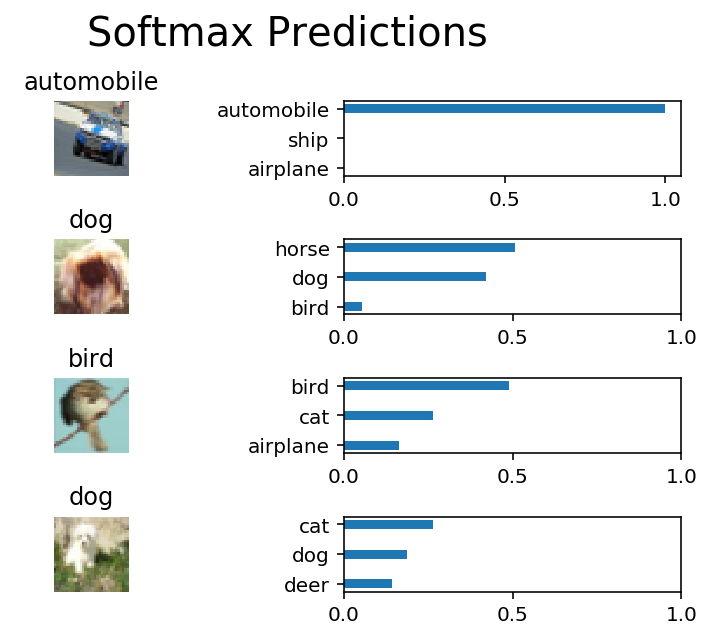

In [57]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.